In [351]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [353]:
df = pd.read_csv(r"https://raw.githubusercontent.com/YBI-Foundation/Dataset/refs/heads/main/Students%20Performance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Поиск доверительного интервала

In [356]:
alpha = 0.95
k1 = df['math score']
k2 = df['writing score']
c1 = stats.norm.interval(confidence = alpha, loc = k1.mean(), scale = np.sqrt(k1.var()/k1.count()))
c2 = stats.norm.interval(confidence = alpha, loc = k2.mean(), scale = np.sqrt(k2.var()/k2.count()))
print(f'95%-й доверительный интервал для math score составляет от {c1[0].round(2)}  до {c1[1].round(2)}')
print(f'95%-й доверительный интервал для writing score составляет от {c2[0].round(2)}  до {c2[1].round(2)}')

95%-й доверительный интервал для math score составляет от 65.15  до 67.03
95%-й доверительный интервал для writing score составляет от 67.11  до 69.0


### тестирование на нормальность распределения

#### тест Шапиро-Уилка

In [360]:
stats.shapiro(k1)

ShapiroResult(statistic=0.9931513872437832, pvalue=0.00014545719606603633)

In [362]:
stats.shapiro(k2)

ShapiroResult(statistic=0.991964462962203, pvalue=2.9215498810124692e-05)

p-value имеет малое значение, значит нулевая гипотеза отвергается, и распеределение для math score и для wtiting score нельзя считать нормальным

#### тест Андерсона-Дарлинга

In [366]:
stats.anderson(k1, dist = 'norm')

AndersonResult(statistic=0.6572122017591937, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=66.089, scale=15.163080096009468)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

Для уровня значимости 0.05 критическое значение составляет 0.784 а наблюдаемое 0.657

In [369]:
stats.anderson(k2)

AndersonResult(statistic=1.447410803838352, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=68.054, scale=15.195657010869642)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

#### Тест Колмогорова-Смирнова

In [372]:
stats.kstest(k1, stats.norm.cdf)

KstestResult(statistic=0.9989999999999993, pvalue=0.0, statistic_location=8, statistic_sign=-1)

In [374]:
stats.kstest(k2, stats.norm.cdf)

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=10, statistic_sign=-1)

p-value имеет малое значение, значит нулевая гипотеза отвергается, и распеределение для math score и для wtiting score нельзя считать нормальным

### Использование альтернативных методов

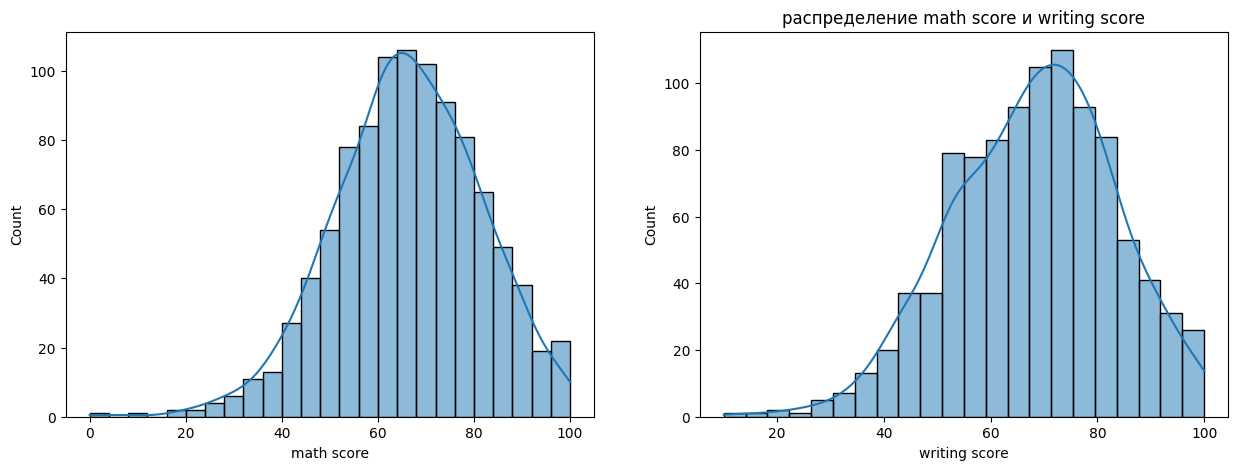

In [378]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
plt.title('распределение math score и writing score')
sns.histplot(k1, kde = True, ax = ax[0])
sns.histplot(k2, kde = True, ax = ax[1])
plt.show()


In [380]:
print('Среднее: ', k1.mean())
print('Медиана: ', k1.median())
print('Скошеность: ', stats.skew(k1))
print('Экцесс: ', stats.kurtosis(k1))

Среднее:  66.089
Медиана:  66.0
Скошеность:  -0.278516571914075
Экцесс:  0.26759715461497846


In [382]:
print('Среднее: ', k2.mean())
print('Медиана: ', k2.median())
print('Скошеность: ', stats.skew(k2))
print('Экцесс: ', stats.kurtosis(k2))

Среднее:  68.054
Медиана:  69.0
Скошеность:  -0.28900962452114176
Экцесс:  -0.03919203131162252


Среднее и медиана и у math score и у writing score имеют близкие значения. Низкие показатели скошености и экцесса позволяет предположить, что распределения math score и writing близки к нормальному.

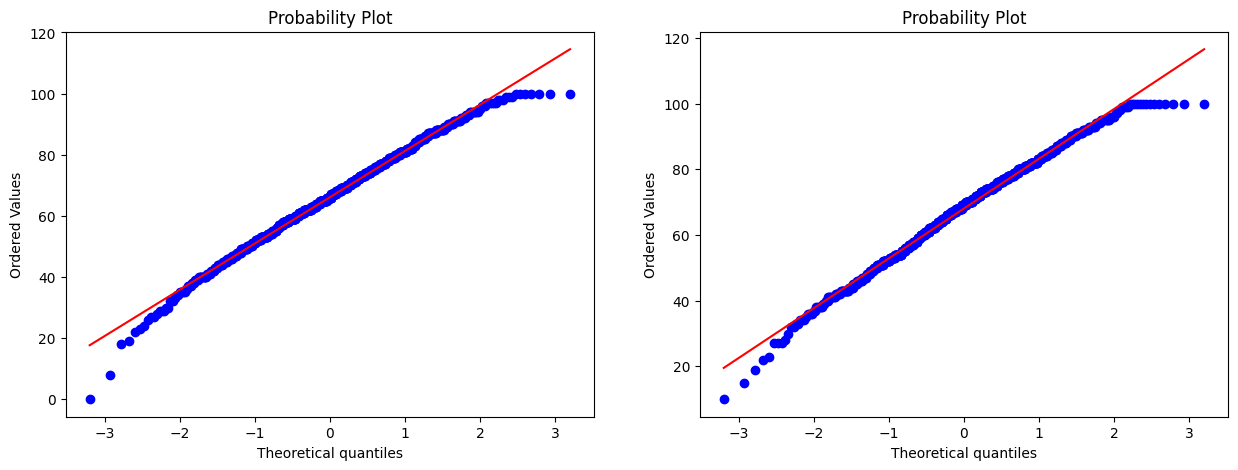

In [385]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
plt.title('QQ-plot для math score и writing score')
stats.probplot(k1, dist = "norm", plot = ax[0])
stats.probplot(k2, dist = "norm", plot = ax[1])
plt.show()

#### Т-тест

In [390]:
k1.mean()

66.089

In [392]:
k2.mean()

68.054

##### протестирую гипотезу, что математическое ожидание получение среднего балла math score составляет 67

In [395]:
stats.ttest_1samp(k1, popmean = 67)

TtestResult(statistic=-1.8999008975567981, pvalue=0.057733868716050414, df=999)

p-value более 5%, нулевая гипотеза не отвергается, следовательно средний балл math score может составлять 67

### Двухвыборочный t-test

In [399]:
stats.ttest_ind(k1, k2)

TtestResult(statistic=-2.89463361444477, pvalue=0.003837200015232258, df=1998.0)

In [401]:
stats.mannwhitneyu(k1,k2)

MannwhitneyuResult(statistic=461212.5, pvalue=0.002661853743057694)

p-value ниже 5%, то есть гипотеза о том, что формы распределения баллов math score и writing score совпадают отвергается

### Scatterplot

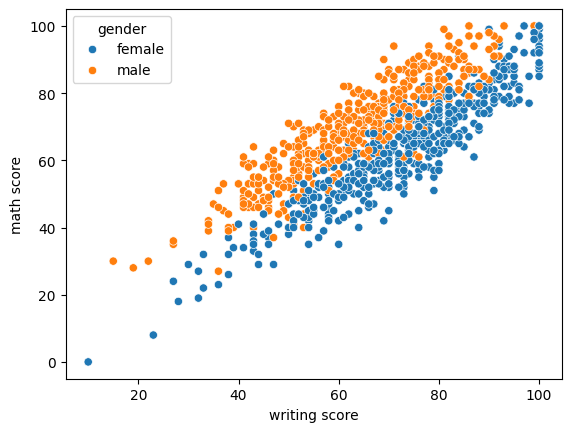

In [405]:
sns.scatterplot(df, x='writing score', y = 'math score', hue = 'gender')
plt.show()

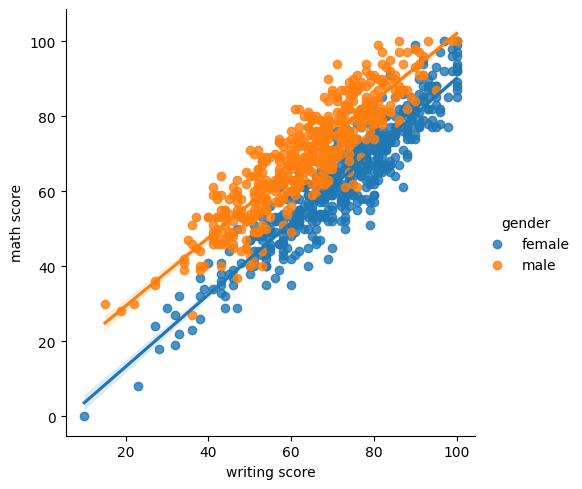

In [407]:
sns.lmplot(df, x='writing score', y = 'math score', hue = 'gender')
plt.show()

In [408]:
df['math score'].corr(df['writing score'])

0.8026420459498085

In [411]:
stats.spearmanr(k1, k2)

SignificanceResult(statistic=0.7783385899971924, pvalue=5.853058974157784e-204)

Коэффициент корреляции 0.8, что позволяет предположить, что переменные имею некую зависимость

### Оценка модели линейной регрессии

In [415]:
X = np.array(df['math score'])
Y = np.array(df['writing score'])
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     1807.
Date:                Sun, 17 Nov 2024   Prob (F-statistic):          3.38e-226
Time:                        23:35:08   Log-Likelihood:                -3622.7
No. Observations:                1000   AIC:                             7249.
Df Residuals:                     998   BIC:                             7259.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.8942      1.283     11.609      0.0

По результатам оценки модели можно сделать вывод, что между math score и writing score есть ненулевая зависимость.
Изменение math score на 64.4% объясняет изменение writing score.
Можно сделать вывод, что студенты имеющие высокий бал по math будут с большой долей вероятности (64.4%) иметь высокий бал по writing score